In [1]:
import pandas as pd
import numpy as np

from data import Data

In [2]:
data = Data("project_train.csv")
data.df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.545,0.884,5,-4.807,0,0.3670,0.290000,0.000000,0.3700,0.641,86.049,1
1,0.795,0.545,7,-8.153,1,0.3430,0.003960,0.000000,0.2730,0.809,91.967,1
2,0.489,0.871,5,-5.825,1,0.3860,0.002850,0.000004,0.1300,0.341,117.431,1
3,0.539,0.931,4,-1.803,0,0.2620,0.000713,0.000000,0.2040,0.685,85.571,0
4,0.918,0.734,11,-2.832,0,0.2690,0.029400,0.000008,0.1910,0.608,97.044,1
...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.897,0.612,11,-10.489,1,0.2110,0.029700,0.186000,0.0894,0.767,102.305,1
501,0.728,0.454,0,-9.281,1,0.0278,0.512000,0.000001,0.0831,0.323,130.368,0
502,0.571,0.837,0,-5.604,1,0.0377,0.165000,0.000005,0.1700,0.713,141.660,1
503,0.582,0.720,10,-9.722,0,0.2310,0.012700,0.035300,0.3630,0.541,89.273,1


In [3]:
#We change the corrupt data manually

data.df.loc[84, "energy"] = 0.734
data.df.loc[94, "loudness"] = -6.542

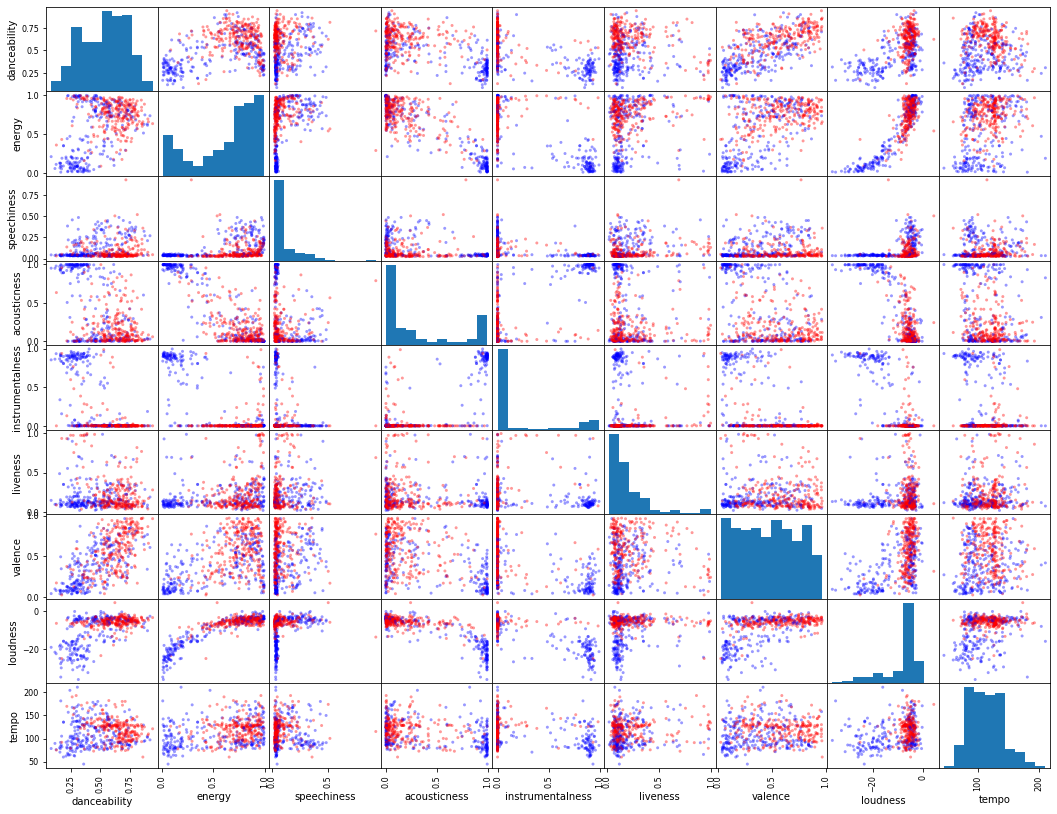

In [4]:
data.visualize()

In [5]:
data.preprocess(shuffle=True, remove_duplicates=True)

There were 6 duplicated elements in the dataset, and have been removed from the dataframe


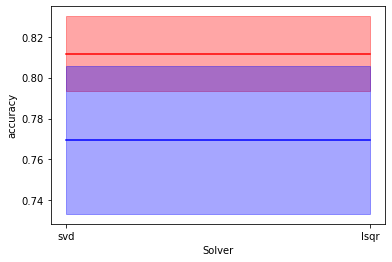

In [6]:
from learning_machine import LDA

solvers = ["svd", "lsqr"] #"eigen" is not used due to problems with the rank
lda = LDA(data)
lda.parameter_search(solvers)

In [7]:
lda_results  = lda.get_table_with_results()
lda_results.style.highlight_max(color = 'lightgreen', axis = 1)

,svd Solver,lsqr Solver
Accuracy,77.0±3.6%,77.0±3.6%
Recall,83.5±4.8%,83.5±4.8%
Precision,73.5±6.0%,73.5±6.0%
F1 Score,78.1±4.7%,78.1±4.7%


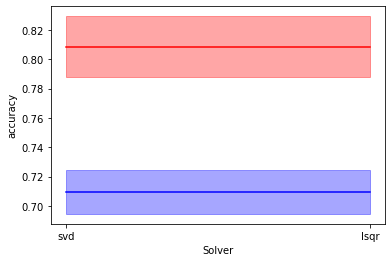

In [8]:
from learning_machine import QDA

solvers = ["svd", "lsqr"] #"eigen" is not used due to problems with the rank
qda = QDA(data)
qda.parameter_search(solvers)

In [9]:
qda_results  = lda.get_table_with_results()
qda_results.style.highlight_max(color = 'lightgreen', axis = 1)

,svd Solver,lsqr Solver
Accuracy,77.0±3.6%,77.0±3.6%
Recall,83.5±4.8%,83.5±4.8%
Precision,73.5±6.0%,73.5±6.0%
F1 Score,78.1±4.7%,78.1±4.7%


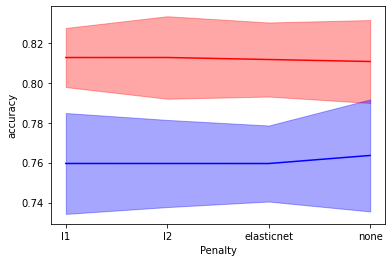

In [10]:
from learning_machine import LogisticRegression

penalty = ["l1", "l2", "elasticnet", "none"]
logistic = LogisticRegression(data)
logistic.parameter_search(penalty)

In [11]:
logistic_results  = logistic.get_table_with_results()
logistic_results.style.highlight_max(color = 'lightgreen', axis = 1)

,l1 Penalty,l2 Penalty,elasticnet Penalty,none Penalty
Accuracy,76.0±2.5%,76.0±2.2%,76.0±1.9%,76.4±2.8%
Recall,80.8±4.6%,80.8±4.6%,80.8±4.6%,80.8±4.6%
Precision,73.5±5.3%,73.4±5.0%,73.3±4.8%,74.1±5.7%
F1 Score,76.8±3.7%,76.8±3.7%,76.8±3.8%,77.1±3.7%


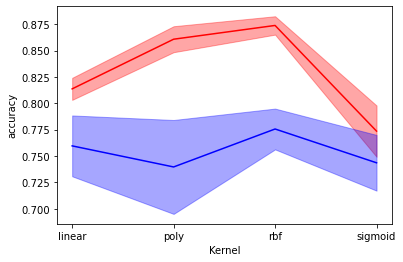

In [12]:
from learning_machine import SVM

kernels = ["linear", "poly", "rbf", "sigmoid"]
svm = SVM(data)
svm.parameter_search(kernels)

In [13]:
svm_results  = svm.get_table_with_results()
svm_results.style.highlight_max(color = 'lightgreen', axis = 1)

,linear Kernel,poly Kernel,rbf Kernel,sigmoid Kernel
Accuracy,76.0±2.9%,74.0±4.5%,77.6±1.9%,74.4±2.6%
Recall,81.0±5.8%,88.2±5.7%,85.8±5.8%,77.5±7.1%
Precision,73.2±5.4%,69.6±8.3%,73.6±5.4%,72.8±6.2%
F1 Score,76.8±4.6%,77.2±3.0%,79.0±3.4%,74.8±4.6%


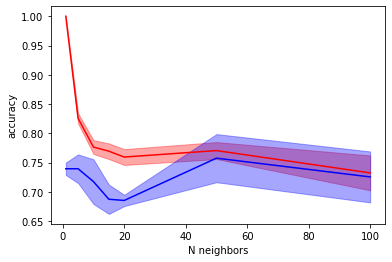

In [14]:
from learning_machine import KNearestNeighbors

n_neighbors = [1, 5, 10, 15, 20, 50, 100]
knearest = KNearestNeighbors(data)
knearest.parameter_search(n_neighbors)

In [15]:
knearest_results  = knearest.get_table_with_results()
knearest_results.style.highlight_max(color = 'lightgreen', axis = 1)

,1 N neighbors,5 N neighbors,10 N neighbors,15 N neighbors,20 N neighbors,50 N neighbors,100 N neighbors
Accuracy,74.0±1.1%,74.0±2.4%,71.8±3.8%,68.7±2.5%,68.5±1.0%,75.8±4.1%,72.6±4.4%
Recall,77.4±1.5%,82.5±3.4%,88.2±5.7%,79.2±8.5%,81.7±10.3%,88.2±3.0%,92.6±2.2%
Precision,72.5±5.5%,70.7±6.6%,67.1±6.8%,66.4±6.9%,65.4±6.7%,71.1±8.1%,66.4±7.2%
F1 Score,74.7±2.1%,75.8±2.9%,75.7±2.3%,71.5±1.7%,71.9±2.8%,78.3±4.0%,77.0±4.0%


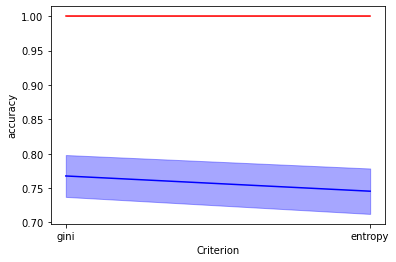

In [16]:
from learning_machine import DecisionTrees

criterions = ["gini", "entropy"]
decisiontree = DecisionTrees(data)
decisiontree.parameter_search(criterions)

In [17]:
decisiontree_results = decisiontree.get_table_with_results()
decisiontree_results.style.highlight_max(color = 'lightgreen', axis = 1)

,gini Criterion,entropy Criterion
Accuracy,76.8±3.0%,74.5±3.3%
Recall,76.8±4.9%,73.4±9.0%
Precision,77.2±8.3%,76.1±4.9%
F1 Score,76.6±3.7%,74.1±2.8%


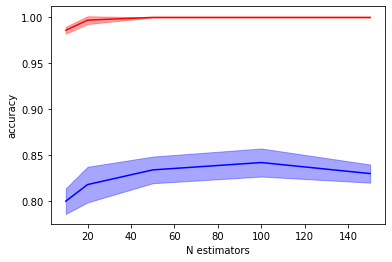

In [18]:
from learning_machine import RandomForest

n_estimators = [10, 20, 50, 100, 150]
randomforest = RandomForest(data)
randomforest.parameter_search(n_estimators)

In [19]:
randomforest_results = randomforest.get_table_with_results()
randomforest_results.style.highlight_max(color = 'lightgreen', axis = 1)

,10 N estimators,20 N estimators,50 N estimators,100 N estimators,150 N estimators
Accuracy,80.0±1.4%,81.8±1.9%,83.4±1.5%,84.2±1.5%,83.0±1.0%
Recall,88.4±4.6%,88.1±4.0%,87.7±0.8%,87.3±0.5%,86.2±2.7%
Precision,75.9±4.3%,78.5±4.9%,80.6±4.9%,82.1±4.6%,81.1±4.0%
F1 Score,81.5±0.5%,82.8±1.5%,83.9±2.3%,84.5±2.2%,83.4±1.0%


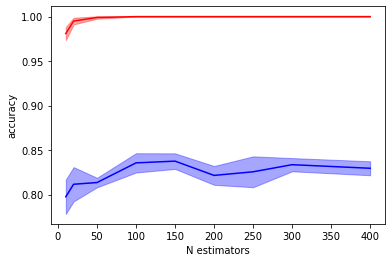

In [20]:
from learning_machine import Bagging

n_estimators = [10, 20, 50, 100, 150, 200, 250, 300, 400]
bagging = Bagging(data)
bagging.parameter_search(n_estimators)

In [21]:
bagging_results = bagging.get_table_with_results()
bagging_results.style.highlight_max(color = 'lightgreen', axis = 1)

,10 N estimators,20 N estimators,50 N estimators,100 N estimators,150 N estimators,200 N estimators,250 N estimators,300 N estimators,400 N estimators
Accuracy,79.8±1.9%,81.2±1.9%,81.4±0.5%,83.6±1.1%,83.8±0.9%,82.2±1.1%,82.6±1.7%,83.4±0.7%,83.0±0.8%
Recall,85.8±1.6%,86.0±3.2%,85.0±2.6%,85.2±0.6%,86.5±2.4%,84.5±3.9%,85.9±0.6%,85.2±1.5%,85.3±2.3%
Precision,76.7±6.2%,78.8±6.6%,79.2±4.2%,82.4±4.2%,81.9±4.5%,80.6±4.5%,80.2±5.1%,82.0±4.4%,81.4±4.1%
F1 Score,80.8±2.6%,81.9±2.0%,81.9±1.8%,83.7±1.9%,84.0±2.1%,82.4±2.5%,82.9±2.9%,83.5±2.2%,83.2±2.0%


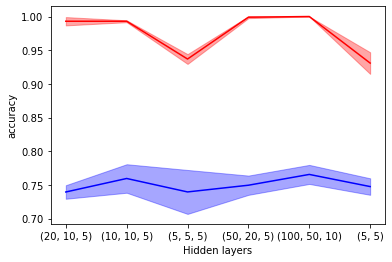

In [22]:
from learning_machine import NeuralNetwork

hidden_layers = [(20,10,5), (10,10,5), (5,5,5), (50,20,5), (100,50,10), (5,5)]
nn = NeuralNetwork(data)
nn.parameter_search(hidden_layers, layers_or_width="both")

In [23]:
nn_results = nn.get_table_with_results()
nn_results.style.highlight_max(color = 'lightgreen', axis = 1)

,"(20, 10, 5) Hidden layers","(10, 10, 5) Hidden layers","(5, 5, 5) Hidden layers","(50, 20, 5) Hidden layers","(100, 50, 10) Hidden layers","(5, 5) Hidden layers"
Accuracy,73.9±1.0%,76.0±2.1%,74.0±3.3%,75.0±1.4%,76.6±1.4%,74.8±1.2%
Recall,77.3±0.9%,76.2±7.0%,73.9±5.0%,74.0±2.4%,76.4±1.7%,75.4±3.6%
Precision,72.4±3.3%,75.9±7.3%,73.3±5.4%,75.5±5.4%,76.6±6.1%,74.3±4.4%
F1 Score,74.7±1.4%,75.6±4.5%,73.6±5.2%,74.6±2.1%,76.3±2.9%,74.7±2.7%


In [24]:
metric_variable = "Accuracy"
threshold = 75

results_df = pd.concat([lda_results, qda_results, logistic_results, svm_results, knearest_results, decisiontree_results, randomforest_results, bagging_results, nn_results], 
                       axis=1, keys=["LDA", "QDA", "Logistic Regression", "SVM", "K Nearest Neighbors", "Decision Trees", "Random Forest", "Bagging", "NN"])
results_df = results_df.transpose()

results_df_float = results_df[metric_variable].str[:2]
results_df_float = pd.to_numeric(results_df_float, downcast="float")

results_df = results_df.loc[results_df_float > threshold]
results_df.style.highlight_max(color = 'lightgreen', axis = 0)